# U.S. Accidents: Exploratory Data Analysis (incomplete project)

This is an analysis of the Kaggle Dataset regarding accidents in the United State of America: https://www.kaggle.com/sobhanmoosavi/us-accidents.

Information from 49 out of the 50 states is included and the dates range from February 2016 until December 2020. There are approximately 4.2 million accident records included in this dataset.

For this project I will be discussing and exploring the following: 
- Discuss the dataset (source code, how we extract, what is the data showing, etc.)
- The preparation and cleaning of the data
- Performing analysis and creating visualizations of observable trends
- Using the data to answer questions and form conclusions, if possible. 

In [2]:
!pip install jovian --upgrade --quiet

## 1. Data Download

First, I should state that I am using the `Jovian.ai` website to host this notebook. Final/complete versions of this notebook will later be uploaded onto hosting sites like Github.

I begin by installing the `opendatasets` Python library as it allows for the downloading of datasets from online sources like Kaggle with simple command lines.

In [3]:
pip install opendatasets --upgrade --quiet

- We can now use the `opendatasets.download` helper function within our notebook.
- Don't forget to import `opendatasets`
- You may be prompted to input your Kaggle credentials. Make sure to generate new API token from your Kaggle account (may vary depending where you are retreiving your data from).

f4654b87e633eaed2c6a5364a7ff13bb

In [4]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: patlfer0078
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 168MB/s]


- Create a link to your files directory

In [5]:
filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## 2. Data Cleaning/Preparation

Now let's load our data to see what needs cleaning and prep it for useability
- Load with Pandas library. Pandas allows for easy manipulation of datasets.
- Option to sort through the data and selectivly choose what we want to use or fix missing/incorrect data values


In [6]:
import pandas as pd

In [7]:
#create a dataframe using pandas 
df = pd.read_csv(filename)

In [8]:
# let's get a snapshot of the dataframe
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


There are 47 columns (topics, categories, etc.) that are listed in this dataframe. We can use the `info()` method to list out the columns with the data type information to make it easier to see what we are working with.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

The `describe()` method can allow us a quick view of some very basic statistics regarding info for each column. 

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


- Find the columns that are of numeric types

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [12]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   End_Lat            float64
 4   End_Lng            float64
 5   Distance(mi)       float64
 6   Number             float64
 7   Temperature(F)     float64
 8   Wind_Chill(F)      float64
 9   Humidity(%)        float64
 10  Pressure(in)       float64
 11  Visibility(mi)     float64
 12  Wind_Speed(mph)    float64
 13  Precipitation(in)  float64
dtypes: float64(13), int64(1)
memory usage: 303.9 MB


From here, it shows that 14 of our columns contain info of numerical value and listed out which of those columns contain strictly numerical values. These will come in handy later. 

Now, we let's identify null or missing values per column and get a count for them. 



In [13]:
# use .isna() to find n/a values, and combine it with sum() to get a count of the missing values
missing_values = df.isna().sum()
missing_values

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

We can convert this information into a percentage of missing values per column. I've also added the `sort_values` method to list the columns by increasing to decreasing values.

In [14]:
missing_perc = missing_values.sort_values(ascending=False) / len(df)
missing_perc

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

To get a better intuition for these percentages, I'll visually demonstrate them on a plot. 
1. Filter out zero value columns. This will make our plot less messy.
2. Create a horizontal bar chart 

In [15]:
# filter out zero value column from series 
miss_perc_nonzero = missing_perc[missing_perc != 0]
miss_perc_nonzero

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

In [16]:
# How many of the nonzero do we have?
len(miss_perc_nonzero)

20

Text(0.5, 1.0, 'Percentage of Missing Data per Column')

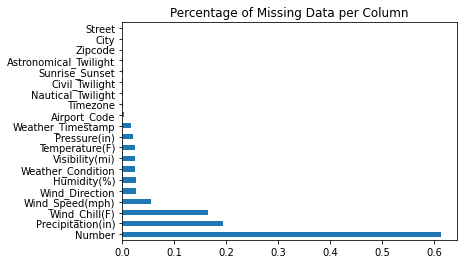

In [17]:
miss_perc_nonzero.plot(kind='barh').set_title('Percentage of Missing Data per Column')

Being able to see this, we can make decisions about which columns we can drop/remove from our dataframe or to be less difficult, just select the columns we want to use. 

- The "Number" column is by far the largest holder of missing or null values. For the purpose of this analysis we will not need this column as it is simply the street number in an address field. 

- moving forward I will only be interested in the city (and maybe states) in which these accidents occur, the time of day the accident occurred, mapping the locations, the severity of the accidents, and weather conditions. 

-I will create a new dataset to more easlity work with the values I will be needing. 

In [18]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [19]:
accidents_df = df[['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Weather_Timestamp', 'Weather_Condition', 'Temperature(F)', 'Visibility(mi)']]
accidents_df

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Weather_Condition,Temperature(F),Visibility(mi)
0,3,2016-02-08 00:37:08,40.108910,-83.092860,Dublin,OH,2016-02-08 00:53:00,Light Rain,42.1,10.0
1,2,2016-02-08 05:56:20,39.865420,-84.062800,Dayton,OH,2016-02-08 05:58:00,Light Rain,36.9,10.0
2,2,2016-02-08 06:15:39,39.102660,-84.524680,Cincinnati,OH,2016-02-08 05:53:00,Overcast,36.0,10.0
3,2,2016-02-08 06:51:45,41.062130,-81.537840,Akron,OH,2016-02-08 06:54:00,Overcast,39.0,10.0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,Cincinnati,OH,2016-02-08 07:53:00,Light Rain,37.0,10.0
...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,Fair,86.0,10.0
2845338,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,Fair,70.0,10.0
2845339,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,Partly Cloudy,73.0,10.0
2845340,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,Fair,71.0,10.0


I created a saving point here, because if you're like me, you get distracted easily and decide to continue on later
- As mentioned, since I am initially hosting this on the Jovian.ai site, I make use of their in-house library to save using the `.commit()` method.

In [20]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/patlfer0078/analysis-us-accidents


'https://jovian.ai/patlfer0078/analysis-us-accidents'

## 3. Analysis & Visualization 
Next we will be looking to analyze certain data from the dataset 

Some columns of interest:
1. City
2. Time of day
3. Location
4. Severity
5. Weather Condition

For data visualization, I chose to go with the Seaborn and matplotlib libraries. Begin by importing the libraries into the notebook and set the styles by preference. 

In [21]:
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### City

- Let's start off by having a look at the cities column listed in our dataframe

In [22]:
# Cities
accidents_df.City  

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

We see that there are 2,845,342 city entries listed in the data, but just how many of there are unique?

In [23]:
len(accidents_df.City.unique())

11682

We found that there are 11,682 unique cities listed in the entire dataset. 

Since there are many cities listed multiple times, we can use the number of occurances as the number of accidents that have been recorded per city.

// Use the following for creating a dataframe for cities and counts:
https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

In [24]:
cities_by_accident = accidents_df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

Let's hold up right here! Notice how when we identified the number of unique cities we had 11,682 cities. Now, when we created a value count for each city, the length of the series is 11,681. We are missing 1 city! 

- Could it be an error from our newly created dataframe? Let's test it against the original data frame and see if the same error generates. 

In [25]:
print("Unique Cities: {}\nCities by count: {}".format(len(df.City.unique()), len(df.City.value_counts())))

Unique Cities: 11682
Cities by count: 11681


It seems that we do receive the same issue when running from our original dataframe. I will come back to this issue in future versions. 

Next let's list out the top 20 cities by accident counts

In [26]:
cities_by_accident = cities_by_accident.rename_axis('Cities').reset_index(name='Counts')
cities_by_accident

,Cities,Counts
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
...,...,...
11676,Ridgedale,1
11677,Sekiu,1
11678,Wooldridge,1
11679,Bullock,1


In [27]:
type(cities_by_accident)

pandas.core.frame.DataFrame

[Text(0.5, 1.0, 'Top 20 Cities by Total Accidents')]

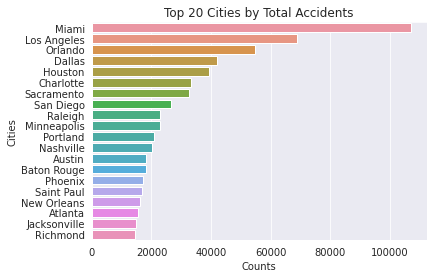

In [28]:
sns.barplot(data=cities_by_accident.head(20), x='Counts', y='Cities').set(title="Top 20 Cities by Total Accidents")

What I've done above is listed out the top 20 cities by total accidents per city and presented it visually in a horizontal bar plot. Some quick observations we see are: 

- Miami has the largest total of accidents recorded, with Orlando leading in third. Both of these cities belong in the state of Florida. 
- Los Angeles follows in second. The next California city is Sacramento, trailing at 7th. 
- Texas, my residing state, has Dallas and Houston in 4th and 5th, respectively. 

Next, I went ahead and created bar plots to compare cities with highest accidents and lowest accidents

- I used 1000 as the metric for High and Low 

In [29]:
high_accident_cities = cities_by_accident[cities_by_accident.Counts >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident.Counts < 1000]

In [30]:
print("# of cities with 1000 accidents & Over: {}\n# of cities under 1000 accidents: {}".format(len(high_accident_cities), len(low_accident_cities)))

# of cities with 1000 accidents & Over: 496
# of cities under 1000 accidents: 11185


In [31]:
one_thousand_acc=pd.DataFrame({'Category':["Above/Equal 1000", "Below 1000"], 'Count':[11185, 496]})
one_thousand_acc

,Category,Count
0,Above/Equal 1000,11185
1,Below 1000,496


In [32]:
type(one_thousand_acc)

pandas.core.frame.DataFrame

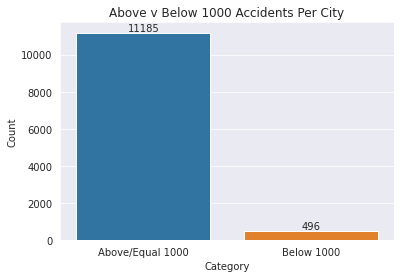

In [33]:
ax = sns.barplot(data=one_thousand_acc, x='Category', y='Count')
ax.set(title="Above v Below 1000 Accidents Per City")

# Yep, this much code just to add some data labels above each barplot
for p in ax.patches:
 height = p.get_height()  # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above each bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

Now I turn these figures into percentages and create a pie plot to visually 

In [34]:
print("Percent of cities over 1000 accidents: {}\nPercent of cities under 1000: {}".format((len(high_accident_cities)/len(cities_by_accident)*100), (len(low_accident_cities)/len(cities_by_accident)*100)))

Percent of cities over 1000 accidents: 4.246211796935194
Percent of cities under 1000: 95.7537882030648


In [35]:
perc_cities = pd.DataFrame({'Category':['Over 1000', 'Under 1000'], 'Percentage':[len(high_accident_cities)/len(cities_by_accident)*100, len(low_accident_cities)/len(cities_by_accident)*100]})
perc_cities

,Category,Percentage
0,Over 1000,4.246212
1,Under 1000,95.753788


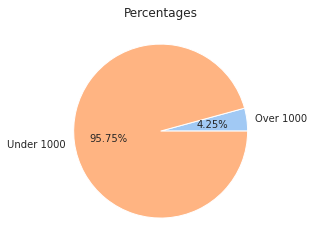

In [36]:
palette_color = sns.color_palette('pastel')
plt.pie(perc_cities.Percentage, labels=perc_cities.Category, colors=palette_color, autopct='%.02f%%')
plt.title("Percentages")
plt.show()

In [37]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/patlfer0078/analysis-us-accidents


'https://jovian.ai/patlfer0078/analysis-us-accidents'

### Time of Day

In [38]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

- Convert to datetime

In [39]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

We can now plot the frequency of accidents that occur during the day and spot which times of day produce the most accidents. 

- Use the `dt.hour` to help convert to time to single hours (instead of exact times)

Text(0.5, 1.0, 'Total Accidents by Hour of Day')

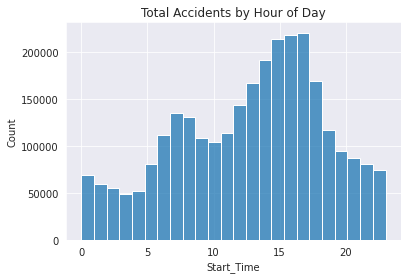

In [40]:
sns.histplot(df.Start_Time.dt.hour, bins=24).set_title("Total Accidents by Hour of Day")

We can show a similar graph, but instead of representing count of accidents we can show percentages
- Simply add the `stat: 'probability'` to the argument

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


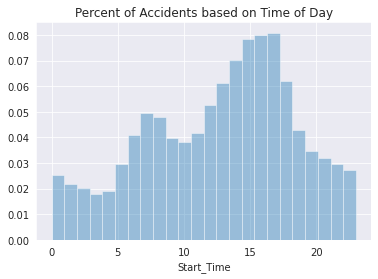

In [41]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True).set_title('Percent of Accidents based on Time of Day');

- We can see that we have two high peaks in which accidents are most likely to occur. We have between 6 to 9 am and then between 3 to 6 pm. These are times most associated with people going to and from home and work. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Percent of Accident by Day of Week')

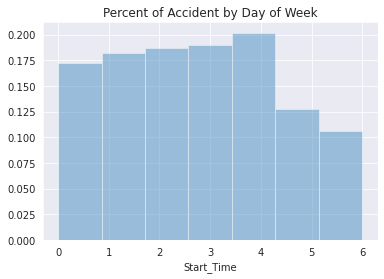

In [42]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True).set_title("Percent of Accident by Day of Week")

Day 0 to 4 mark Monday to Friday, while 5 to 6 mark Saturday and Sunday. 
- We can see that the distribution is pretty even accross for the weekdays. 

We have seen how the distribution of accidents spreads out during the week as well during the time of day. During the weekend, does the distribution by hour look similar to that during the weekdays. In other words, will it trend with the overall hourly distribution I have shown above?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saturday Accident Percentages by Hour')

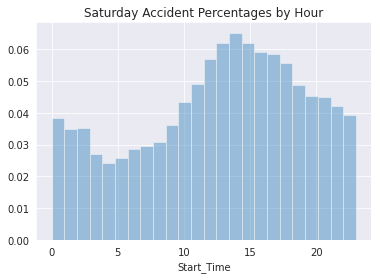

In [43]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturday_start_time.dt.hour, bins=24, kde=False, norm_hist=True).set_title("Saturday Accident Percentages by Hour")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sunday Accident Percentages by Hour')

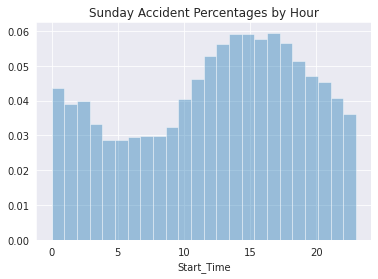

In [44]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist=True).set_title("Sunday Accident Percentages by Hour")

Let's see how this distribution changes by month. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Accident Percentages by Month')

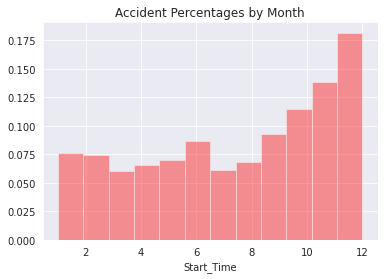

In [45]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True, color='r').set_title("Accident Percentages by Month")

According to our dataset, there is a higher percentage of accidents going in the Fall and even moreso in the Winter months. Let's break it down by years to see if there is any missing/inconclusive data or changes from this trend. 

In [46]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2017 = df[df.Start_Time.dt.year == 2017]
df_2018 = df[df.Start_Time.dt.year == 2018]
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2020 = df[df.Start_Time.dt.year == 2020]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2016')

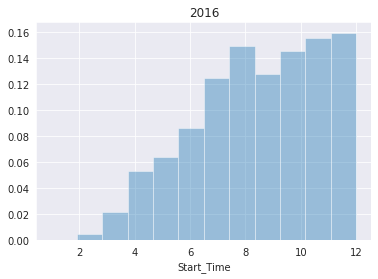

In [47]:
# 2016
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True).set_title('2016')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2017')

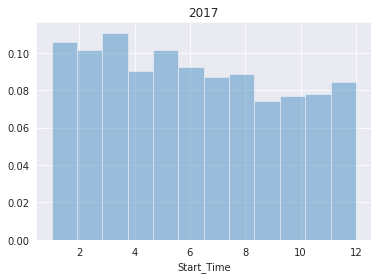

In [48]:
# 2017
sns.distplot(df_2017.Start_Time.dt.month, bins=12, kde=False, norm_hist=True).set_title('2017')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2018')

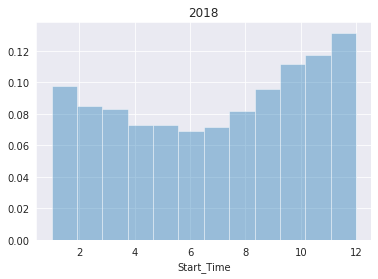

In [49]:
# 2018
sns.distplot(df_2018.Start_Time.dt.month, bins=12, kde=False, norm_hist=True).set_title('2018')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2019')

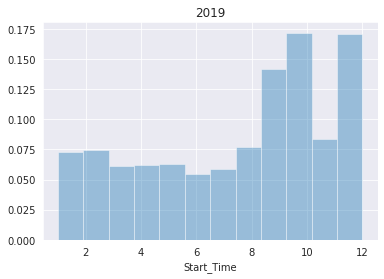

In [50]:
# 2019
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True).set_title('2019')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2020')

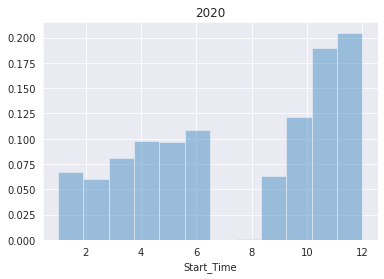

In [51]:
# 2020
sns.distplot(df_2020.Start_Time.dt.month, bins=12, kde=False, norm_hist=True).set_title('2020')

### Location, Location, Location

In [52]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [53]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

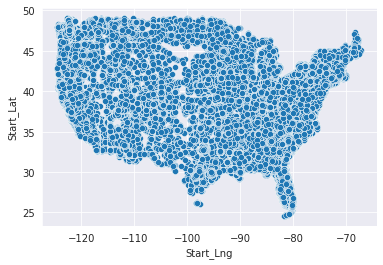

In [54]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

We can create a sample size to better visualize our distribution

In [55]:
sample_df = df.sample(int(0.1 * len(df)))

Text(0.5, 1.0, 'Sample of Latitute and Longitude data')

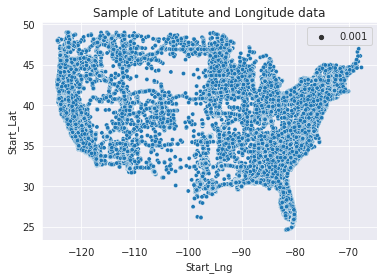

In [56]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001).set_title('Sample of Latitute and Longitude data')

Let's visualize this on a map using Folium. 
Note: This is my first time ever using folium so excuse any messy code

- I will be creating a heat map. Note: Heatmaps do not take dataframes so our latitude and longitude data will have to be created into a list

In [57]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [58]:
new_sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = zip(list(new_sample_df.Start_Lat), list(new_sample_df.Start_Lng))

In [59]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Severity

I did some digging in the Kaggle discussions regarding the dataset to understand more about what made up severity. What I found from the author was that severity varied from a scale of 1-4, with 4 being the worst. 

However, there was not much information regarding about what makes the one accident more severe than another. I was able to identify some metrics that the reporting bodies used to somewhat measure severity. 
They are as follows: 
- Delay: how much delay in typical traffic flow should we expect as result of the accident
- Distance: how long was the road extent that was impacted by the accident
- Duration: how long did it take to clear the accident scene


### Weather Conditions

In [60]:
temperatures = df['Temperature(F)'].value_counts()
temperatures

 73.0     64505
 77.0     63575
 75.0     60534
 72.0     59681
 68.0     58557
          ...  
 109.8        1
-9.8          1
 170.6        1
 107.2        1
 99.1         1
Name: Temperature(F), Length: 788, dtype: int64

In [61]:
ax = df.plot(kind='barh', x='GDP', y='life_expectancy')

KeyError: ignored

## 4. Questions and Conclusions

1. Does warmer or colder weather conditions contribute to more accidents?
2. What 5 states have the highest number of accidents? Which 5 have the highest per capita?
3. Does New York show up in data? If so, how is the most populated city in the US not ranking among the higher accident counts?
4. Based on the top 100 cities per accidents, which states do they belong to most frequently?
5. What time of the day has the highest frequency of accidents? 
6. Which days of the week sees the most accidents occuring? 
7. Which months have the highest number of accidents?
8. How have the number of accidents trended over the years? 

Insights: 
- New York State data is not included. UPDATE: Found 'New York' City in data. 
- Less than 6% of cities have more than 1000 yearly accidents
- Over 1200 cities have reported just one accident. Investigate further. 
- The number of accidents per city decreases exponentially

In [ ]:
#How many incidents did New York City have? 
df[df.City == 'New York'].shape[0]

What else can be said about our data? What about our sources; How much of data was given by certain sources? 

In [ ]:
df.Source

In [ ]:
sources = df.Source.value_counts()
sources.plot.pie(autopct="%.1f%%")

In [ ]:
jovian.commit()